In [3]:
import lightning as L 
import matplotlib.pyplot as plt
import lightning as L
from lightning.pytorch.tuner import Tuner
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor, EarlyStopping, StochasticWeightAveraging
import torch 
import numpy as np
import pandas as pd
import sys, json
from os.path import dirname, abspath, join

torch.set_default_dtype(torch.float64)
torch.set_float32_matmul_precision("high")

sys.path.append('G:/Codes/LuttingerWard_from_ML/code/models')
from model_AE_FC_transfer import AE_FC_02
sys.path.append('G:/Codes/LuttingerWard_from_ML/code/models/IO')
from DataMod_FC import *

In [40]:
ckp_path = 'G:/Codes/LuttingerWard_from_ML/.neptune/AE_FC_scale_01/LWAEP-163/checkpoints/last.ckpt'
cfg_path = 'G:/Codes/LuttingerWard_from_ML/configs/confmod_AE_FC_transfer.json'
cfg = json.load(open(cfg_path))    
checkpoint = torch.load(ckp_path)

G:
SE:


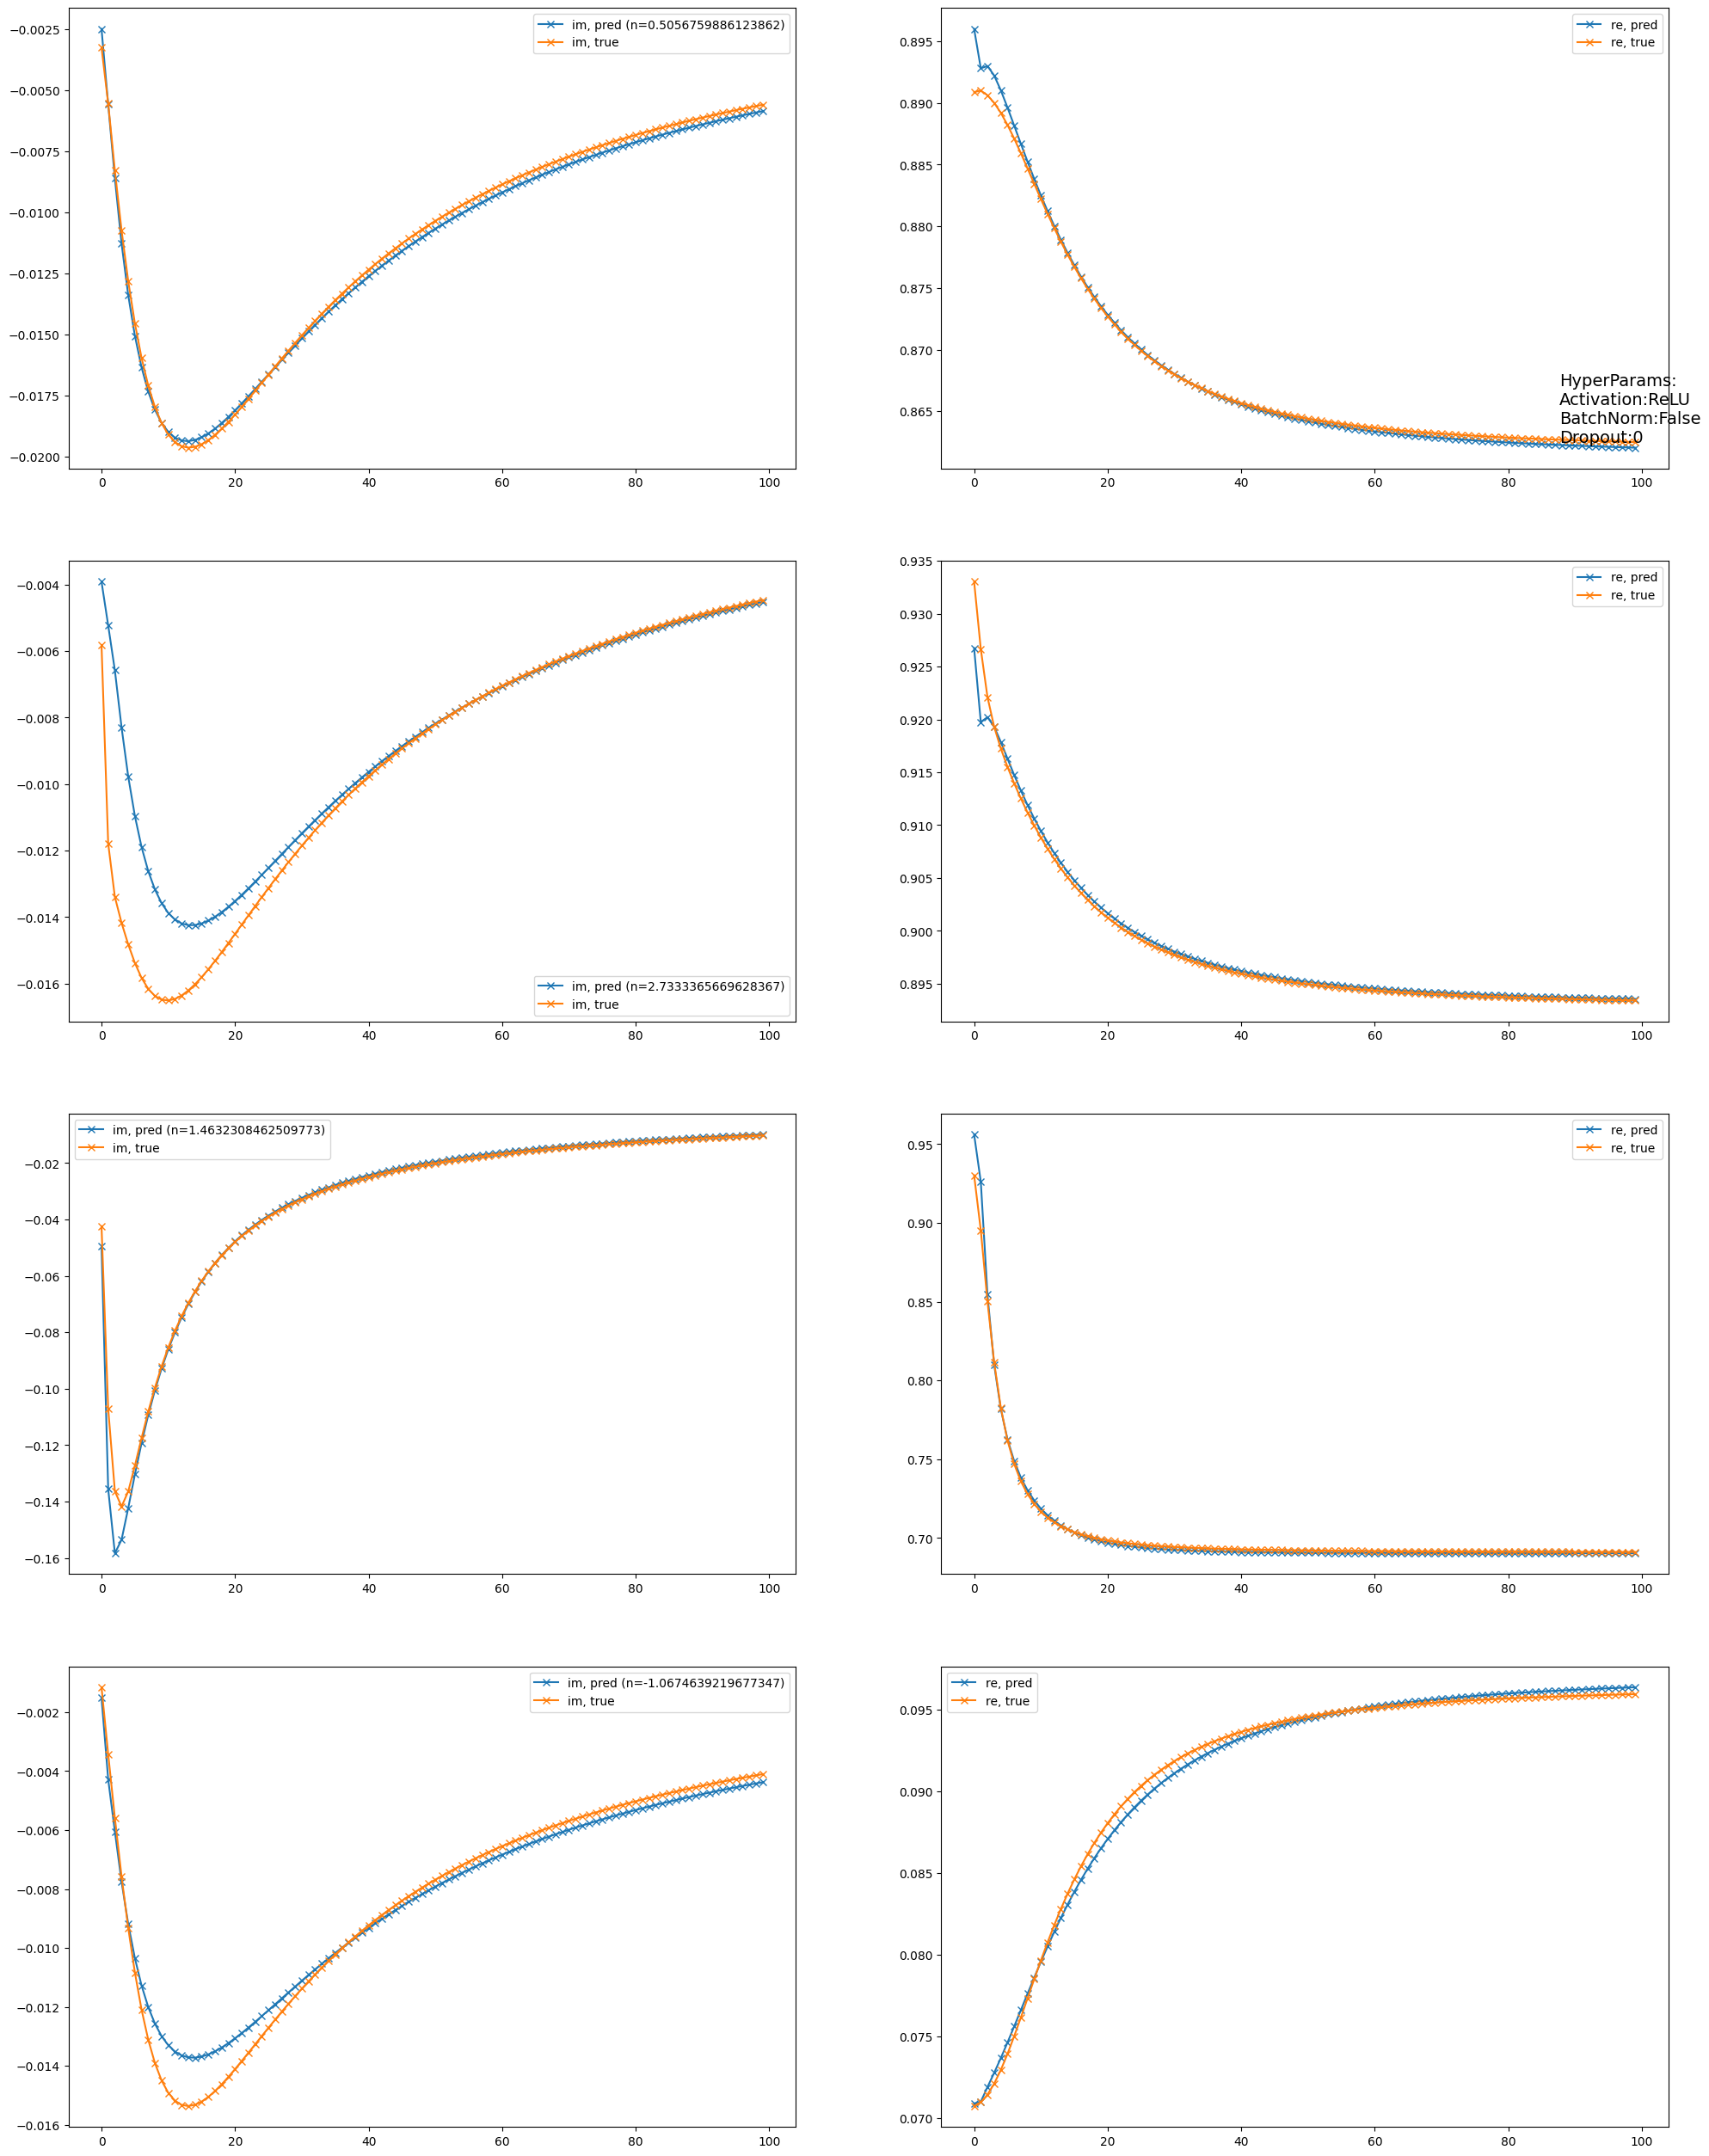

In [41]:

cfg['FC_layers'] = 7
model = AE_FC_02.load_from_checkpoint(ckp_path, config=cfg)
dataMod = DataMod_FC(cfg)
dataMod.setup(stage='test')
device = "cpu"
model.to(device)
model.eval()
ind_list = [-1, -2, -3, -1501]#,-1506,-1510,-1511,-1514,-1515, -1517, -1521]

fig,ax = plt.subplots(len(ind_list),2, figsize=(24,8*len(ind_list)))
for i,ind in enumerate(ind_list):
    x_test, y_test = dataMod.val_dataset[ind]
    x_test = x_test.to(device).reshape(1,-1)
    y_pred = model(x_test).detach().numpy()

    if i == 0:
        text = "HyperParams:\nActivation:{}\nBatchNorm:{}\nDropout:{}".format(model.hparams["activation"],model.hparams["with_batchnorm"],model.hparams["dropout"])
        ax[i,1].text(0.85, 0.05, text, transform=ax[i,1].transAxes, fontsize=14,
        verticalalignment='bottom')
    ax[i,0].plot(y_pred[0,100:], marker="x", label="im, pred (n="+str(x_test.detach().numpy()[0,0])+")")
    ax[i,0].plot(y_test[100:], marker="x", label="im, true")
    ax[i,0].legend()

    ax[i,1].plot(y_pred[0,0:100], marker="x", label="re, pred")
    ax[i,1].plot(y_test[0:100], marker="x", label="re, true")
    ax[i,1].legend()
    
#fig.suptitle('No Dropout, Weighted, Medium Model Size, Medium Training Size ', fontsize=20)
plt.show()